In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("GPU disponible" if torch.cuda.is_available() else "Aucun GPU détecté.")

GPU disponible


In [9]:
print(torch.cuda.get_device_name(0))
print('Mémoire GPU utilisée:', torch.cuda.memory_allocated() / 1024**2, 'MB')


NVIDIA GeForce RTX 3060
Mémoire GPU utilisée: 0.0 MB


In [ ]:
desktop_path = os.path.expanduser("~/Desktop/PCD/PlantVillage")     
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
L=list()
 
for folder_name in os.listdir(desktop_path):
    folder_path = os.path.join(desktop_path, folder_name)
    if os.path.isdir(folder_path):
        image_count = sum(
            1 for file in os.listdir(folder_path)
            if file.lower().endswith(image_extensions)
        )
        print(f"{folder_name} : {image_count} images")
    L.append((folder_name , image_count))



Apple___Apple_scab : 630 images
Apple___Black_rot : 621 images
Apple___Cedar_apple_rust : 275 images
Apple___healthy : 1645 images
Blueberry___healthy : 1502 images
Cherry_(including_sour)___healthy : 854 images
Cherry_(including_sour)___Powdery_mildew : 1052 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 513 images
Corn_(maize)___Common_rust_ : 1192 images
Corn_(maize)___healthy : 1162 images
Corn_(maize)___Northern_Leaf_Blight : 985 images
Grape___Black_rot : 1180 images
Grape___Esca_(Black_Measles) : 1383 images
Grape___healthy : 423 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) : 1076 images
Orange___Haunglongbing_(Citrus_greening) : 5507 images
Peach___Bacterial_spot : 2297 images
Peach___healthy : 360 images
Pepper,_bell___Bacterial_spot : 997 images
Pepper,_bell___healthy : 1478 images
Potato___Early_blight : 1000 images
Potato___healthy : 152 images
Potato___Late_blight : 1000 images
Raspberry___healthy : 371 images
Soybean___healthy : 5090 images
Squash___Powd

In [11]:
print(L)

[('Apple___Apple_scab', 630), ('Apple___Black_rot', 621), ('Apple___Cedar_apple_rust', 275), ('Apple___healthy', 1645), ('Blueberry___healthy', 1502), ('Cherry_(including_sour)___healthy', 854), ('Cherry_(including_sour)___Powdery_mildew', 1052), ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 513), ('Corn_(maize)___Common_rust_', 1192), ('Corn_(maize)___healthy', 1162), ('Corn_(maize)___Northern_Leaf_Blight', 985), ('Grape___Black_rot', 1180), ('Grape___Esca_(Black_Measles)', 1383), ('Grape___healthy', 423), ('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 1076), ('Orange___Haunglongbing_(Citrus_greening)', 5507), ('Peach___Bacterial_spot', 2297), ('Peach___healthy', 360), ('Pepper,_bell___Bacterial_spot', 997), ('Pepper,_bell___healthy', 1478), ('Potato___Early_blight', 1000), ('Potato___healthy', 152), ('Potato___Late_blight', 1000), ('Raspberry___healthy', 371), ('Soybean___healthy', 5090), ('Squash___Powdery_mildew', 1835), ('Strawberry___healthy', 456), ('Strawberry___Leaf_s

In [12]:
Lnameinf=list()
Linf=list()
for esp in L : 
    if esp[1] < 1000 :
        Linf.append(L)
        Lnameinf.append(esp[0])

print(Linf)


[[('Apple___Apple_scab', 630), ('Apple___Black_rot', 621), ('Apple___Cedar_apple_rust', 275), ('Apple___healthy', 1645), ('Blueberry___healthy', 1502), ('Cherry_(including_sour)___healthy', 854), ('Cherry_(including_sour)___Powdery_mildew', 1052), ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 513), ('Corn_(maize)___Common_rust_', 1192), ('Corn_(maize)___healthy', 1162), ('Corn_(maize)___Northern_Leaf_Blight', 985), ('Grape___Black_rot', 1180), ('Grape___Esca_(Black_Measles)', 1383), ('Grape___healthy', 423), ('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 1076), ('Orange___Haunglongbing_(Citrus_greening)', 5507), ('Peach___Bacterial_spot', 2297), ('Peach___healthy', 360), ('Pepper,_bell___Bacterial_spot', 997), ('Pepper,_bell___healthy', 1478), ('Potato___Early_blight', 1000), ('Potato___healthy', 152), ('Potato___Late_blight', 1000), ('Raspberry___healthy', 371), ('Soybean___healthy', 5090), ('Squash___Powdery_mildew', 1835), ('Strawberry___healthy', 456), ('Strawberry___Leaf_

In [13]:
print(Lnameinf)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___healthy', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Potato___healthy', 'Raspberry___healthy', 'Strawberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus']


In [14]:
print(len(Linf))

14


In [15]:
base_path = os.path.expanduser("~/Desktop/PCD/PlantVillage")
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

total_images = 0

for folder_name in Lnameinf:
    folder_path = os.path.join(base_path, folder_name)
    if os.path.isdir(folder_path):
        count = sum(
            1 for file in os.listdir(folder_path)
            if file.lower().endswith(image_extensions)
        )
        print(f"{folder_name} : {count} images")
        total_images += count
    else:
        print(f"Dossier non trouvé : {folder_name}")

print(f"\nNombre total d’images dans les dossiers listés : {total_images}")

Apple___Apple_scab : 630 images
Apple___Black_rot : 621 images
Apple___Cedar_apple_rust : 275 images
Cherry_(including_sour)___healthy : 854 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 513 images
Corn_(maize)___Northern_Leaf_Blight : 985 images
Grape___healthy : 423 images
Peach___healthy : 360 images
Pepper,_bell___Bacterial_spot : 997 images
Potato___healthy : 152 images
Raspberry___healthy : 371 images
Strawberry___healthy : 456 images
Tomato___Leaf_Mold : 952 images
Tomato___Tomato_mosaic_virus : 373 images

Nombre total d’images dans les dossiers listés : 7962


In [16]:
# Définir les chemins
script_dir = os.getcwd()
DATASET_PATH = os.path.join(script_dir, "PlantVillage")

In [17]:
# Paramètres
IMG_SIZE = 224
BATCH_SIZE = 32


In [18]:
# Transformations pour les images
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

In [19]:

# Chargement du dataset
dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)


In [20]:
# Split train / validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [21]:
len(train_dataset)

43452

In [22]:

len(val_dataset)

10863

In [23]:
print(val_dataset)

In [24]:
# Afficher les labels attribués automatiquement par PyTorch via ImageFolder
label = list()

print("Classes détectées et leurs indices :")
for i, class_name in enumerate(val_dataset.dataset.classes):  # <- accès via .dataset
    print(f"{i}: {class_name}")
    label.append((i, class_name))


Classes détectées et leurs indices :
0: Apple___Apple_scab
1: Apple___Black_rot
2: Apple___Cedar_apple_rust
3: Apple___healthy
4: Blueberry___healthy
5: Cherry_(including_sour)___Powdery_mildew
6: Cherry_(including_sour)___healthy
7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8: Corn_(maize)___Common_rust_
9: Corn_(maize)___Northern_Leaf_Blight
10: Corn_(maize)___healthy
11: Grape___Black_rot
12: Grape___Esca_(Black_Measles)
13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14: Grape___healthy
15: Orange___Haunglongbing_(Citrus_greening)
16: Peach___Bacterial_spot
17: Peach___healthy
18: Pepper,_bell___Bacterial_spot
19: Pepper,_bell___healthy
20: Potato___Early_blight
21: Potato___Late_blight
22: Potato___healthy
23: Raspberry___healthy
24: Soybean___healthy
25: Squash___Powdery_mildew
26: Strawberry___Leaf_scorch
27: Strawberry___healthy
28: Tomato___Bacterial_spot
29: Tomato___Early_blight
30: Tomato___Late_blight
31: Tomato___Leaf_Mold
32: Tomato___Septoria_leaf_spot
33: Tomat

In [25]:
class_name = list()
for i in range(len(label)) :
    class_name.append(label[i][1])

print(class_name)
print(len(class_name))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [27]:
# Nombre de classes
num_classes = len(dataset.classes)
print(num_classes)

38


In [28]:
# Chargement de ResNet50 pré-entraîné
model = models.resnet50(pretrained=True)

c:\Users\GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:

# Modification de la couche finale
model.fc = nn.Linear(model.fc.in_features, num_classes)


In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:


# Vérifie si CUDA est disponible et définit le périphérique en conséquence
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_tensor = torch.randn(BATCH_SIZE, 3, 224, 224)   

# Déplacer le modèle et les tenseurs vers le GPU
model.to(device)
input_tensor = input_tensor.to(device) 


In [32]:
LR = 0.01

In [33]:
# Définition de la fonction de perte et de l’optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)


In [34]:
print(train_loader)

In [35]:
EPOCHS =40


In [ ]:
for epoch in range(EPOCHS):
    # -------------------
    # Phase d'entraînement
    # -------------------
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    # -------------------
    # Phase de validation
    # -------------------
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Pas de calcul de gradients en validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * val_correct / val_total

    # -------------------
    # Affichage des résultats
    # -------------------
    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")


Epoch 1/40 | Train Loss: 1.7049, Train Acc: 51.82% | Val Loss: 0.8657, Val Acc: 72.48%
Epoch 2/40 | Train Loss: 0.5241, Train Acc: 83.39% | Val Loss: 0.4574, Val Acc: 85.64%
Epoch 3/40 | Train Loss: 0.3157, Train Acc: 89.71% | Val Loss: 0.2138, Val Acc: 92.97%
Epoch 4/40 | Train Loss: 0.2408, Train Acc: 92.07% | Val Loss: 0.8171, Val Acc: 79.58%
Epoch 5/40 | Train Loss: 0.2031, Train Acc: 93.26% | Val Loss: 0.2413, Val Acc: 91.92%
Epoch 6/40 | Train Loss: 0.1658, Train Acc: 94.40% | Val Loss: 0.1240, Val Acc: 95.93%
Epoch 7/40 | Train Loss: 0.1418, Train Acc: 95.31% | Val Loss: 0.1505, Val Acc: 95.35%
Epoch 8/40 | Train Loss: 0.1289, Train Acc: 95.58% | Val Loss: 0.3158, Val Acc: 91.12%
Epoch 9/40 | Train Loss: 0.1152, Train Acc: 96.17% | Val Loss: 0.1297, Val Acc: 95.80%
Epoch 10/40 | Train Loss: 0.1022, Train Acc: 96.54% | Val Loss: 0.1276, Val Acc: 95.87%
Epoch 11/40 | Train Loss: 0.0931, Train Acc: 96.82% | Val Loss: 0.1380, Val Acc: 95.77%
Epoch 12/40 | Train Loss: 0.0876, Train A

In [37]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


In [38]:
train_losses = [
    1.7049, 0.5241, 0.3157, 0.2408, 0.2031, 0.1658, 0.1418, 0.1289, 0.1152, 0.1022,
    0.0931, 0.0876, 0.0792, 0.0752, 0.0642, 0.0641, 0.0609, 0.0599, 0.0538, 0.0553,
    0.0485, 0.0448, 0.0457, 0.0447, 0.0412, # ...
    0.0308, 0.0277, 0.0296, 0.0258
]

train_accuracies = [
    51.82, 83.39, 89.71, 92.07, 93.26, 94.40, 95.31, 95.58, 96.17, 96.54,
    96.82, 97.07, 97.38, 97.41, 97.72, 97.83, 98.00, 98.06, 98.15, 98.15,
    98.33, 98.46, 98.51, 98.47, 98.54, # ...
    98.98, 99.10, 99.03, 99.12
]

val_losses = [
    0.8657, 0.4574, 0.2138, 0.8171, 0.2413, 0.1240, 0.1505, 0.3158, 0.1297, 0.1276,
    0.1380, 0.0941, 0.0867, 0.1040, 0.1070, 0.0783, 0.1050, 0.0807, 0.1033, 0.0697,
    0.1102, 0.2525, 0.0917, 0.1068, 0.0740, # ...
    0.0905, 0.0811, 0.0833, 0.0856
]

val_accuracies = [
    72.48, 85.64, 92.97, 79.58, 91.92, 95.93, 95.35, 91.12, 95.80, 95.87,
    95.77, 96.98, 97.39, 96.91, 96.72, 97.60, 96.85, 97.68, 97.28, 98.06,
    96.84, 94.01, 97.39, 96.94, 98.06, # ...
    97.72, 98.07, 98.14, 97.87
]


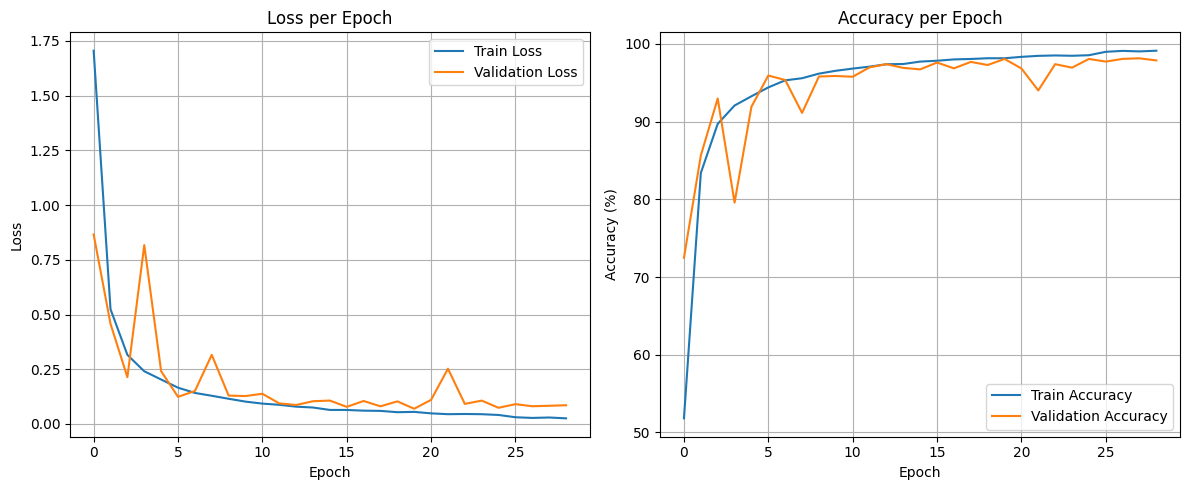

In [39]:
import matplotlib.pyplot as plt

# Courbe des pertes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Courbe des accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [42]:
# Évaluation simple sur le dataset de validation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"Accuracy sur la validation: {100 * correct / total:.2f}%")

Accuracy sur la validation: 97.87%


In [30]:
pip install seaborn


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.5 MB 2.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.5 MB 1.9 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.5 MB 1.9 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.5 MB 1.9 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.5 MB 1.5 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.5 MB 1.5 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.5 MB 1.5 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.5 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.5 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.5 MB 1.2 MB/s eta 0:00:08
   --------- 


🔎 Accuracy de validation : 97.87%

📊 Rapport de classification :

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.96      0.98       132
                                 Apple___Black_rot       0.99      0.99      0.99       115
                          Apple___Cedar_apple_rust       1.00      0.98      0.99        64
                                   Apple___healthy       0.99      0.98      0.99       308
                               Blueberry___healthy       0.99      0.99      0.99       333
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       205
                 Cherry_(including_sour)___healthy       0.92      0.99      0.95       175
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.88      0.88       102
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       224
            

C:\Users\GAMING\AppData\Local\Temp\ipykernel_9892\23585647.py:39: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GAMING\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


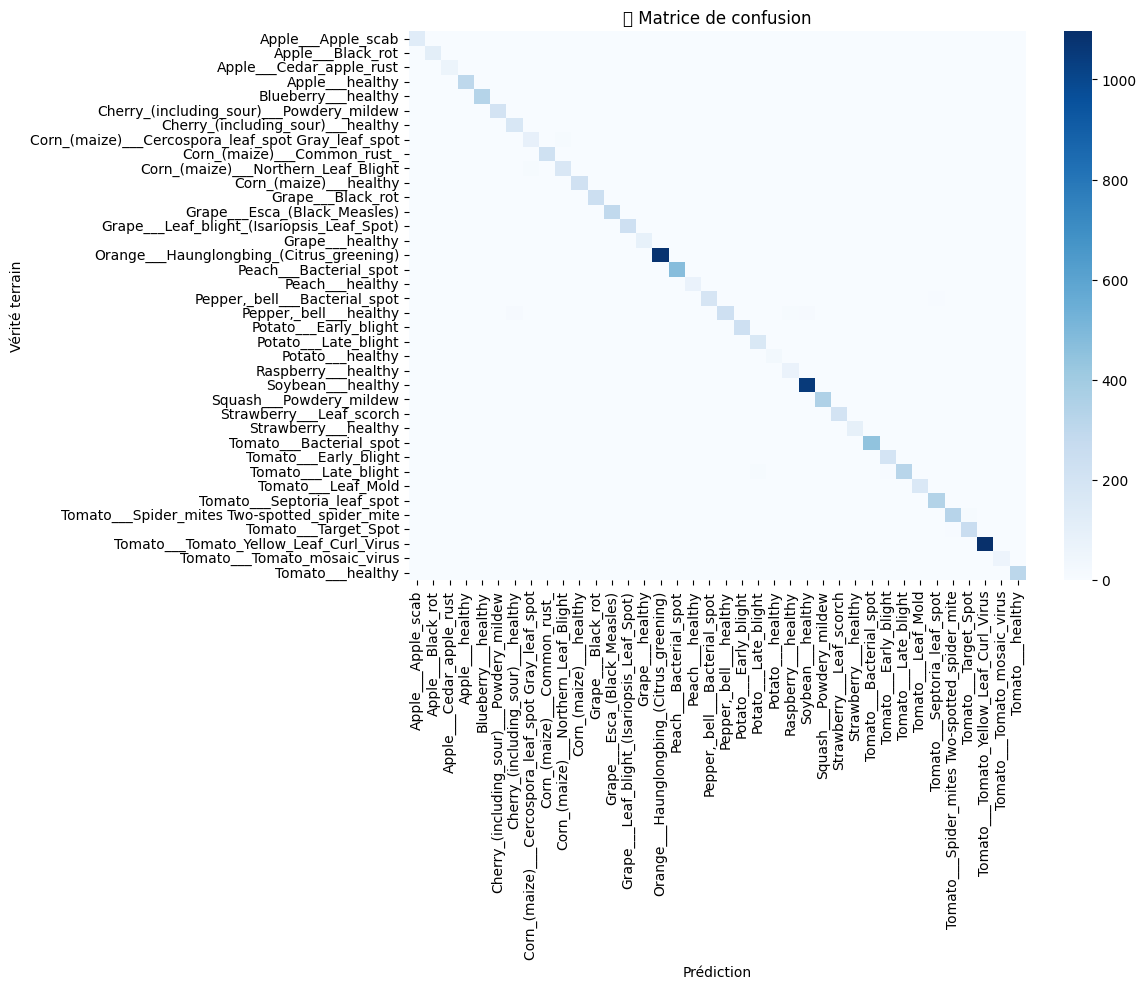

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mode évaluation
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Précision globale
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"\n🔎 Accuracy de validation : {accuracy * 100:.2f}%\n")

# Rapport de classification
print("📊 Rapport de classification :\n")
print(classification_report(y_true, y_pred, target_names=dataset.classes))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title("🧩 Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [45]:
# Sauvegarder le modèle pour Raspberry Pi
MODEL_PATH = r"C:\Users\GAMING\Desktop\PCD\plant_disease_model.pth"
torch.save(model.state_dict(), MODEL_PATH)
print(f"Modèle sauvegardé dans {MODEL_PATH}")


Modèle sauvegardé dans C:\Users\GAMING\Desktop\PCD\plant_disease_model.pth
